# Distance/Reconstruction기반 Novelty Detection

![title](http://cfile212.uf.daum.net/image/99D0F2335A1AE264149F37)

# 1. KNN-based novelty detection

![title](http://cfile220.uf.daum.net/image/992AB2335A1D71302D07A4)

## Python Code

### 1) Max,Avg Distance to the k-th Nearest Neighbor

![title](http://cfile222.uf.daum.net/image/999B28335A1D71300D8749)

In [3]:
import numpy as np
import math
import operator
 

def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1

    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
  
    distances.sort(key=operator.itemgetter(1))
    
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x])
 
    return neighbors


def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)

    return math.sqrt(distance)
 
def main():
	
    # prepare data
    trainingSet = [[1,2,'-'],[2,2,'-'],[3,2,'-'],[4,2,'-'],[1,1,'-'],[2,1,'-'],[3,1,'-'],[4,1,'-']]
    testSet = [[2.5,2.5,'-'],[0.7,1,'-']]
    #trainingSet = [[1,1,'-'],[2,1,'-'],[3,1,'-'],[1.5,2,'-'],[2.5,2,'-']]
    #testSet = [[1.15,1.2,'-'],[2,2.2,'-']]
    
    k = 4

    neighbors_inform=[]
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        neighbors=np.array(neighbors)
        neighbors_inform.append(neighbors)
        
    print('neighbors_inform:',neighbors_inform)
    
    neighbors_dist=np.array(neighbors_inform)[:,:,1]
    knn_dist_max=np.max(neighbors_dist,axis=1)
    knn_dist_avg=np.mean(neighbors_dist,axis=1)
    
    print('knn_dist_max:',knn_dist_max)
    print('knn_dist_avg:',knn_dist_avg)
    

main()

neighbors_inform: [array([[list([2, 2, '-']), 0.7071067811865476],
       [list([3, 2, '-']), 0.7071067811865476],
       [list([1, 2, '-']), 1.5811388300841898],
       [list([4, 2, '-']), 1.5811388300841898]], dtype=object), array([[list([1, 1, '-']), 0.30000000000000004],
       [list([1, 2, '-']), 1.044030650891055],
       [list([2, 1, '-']), 1.3],
       [list([2, 2, '-']), 1.6401219466856727]], dtype=object)]
knn_dist_max: [1.5811388300841898 1.6401219466856727]
knn_dist_avg: [1.1441228056353687 1.071038149394182]


![title](http://cfile225.uf.daum.net/image/990B5C335A1D713030F7E5)

### 2) Mean Distance to the k-th Nearest Neighbor

![title](http://cfile227.uf.daum.net/image/99C78A335A1D7131094800)

In [7]:
import numpy as np
import math
import operator
 

def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1

    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
  
    distances.sort(key=operator.itemgetter(1))
    
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x])
    return neighbors


def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)


def centroid(neighborcoor,k,length):
    centro=[]   
    for x in range(length):
        mean_coor=0
        for y in range(k):
            mean_coor += neighborcoor[y][x]
        centro.append(mean_coor/k)
    return centro


def meanDistance(neighborcoor,testInstance,k):
    meandist = []
    length = len(testInstance)-1
    center = centroid(neighborcoor,k,length)
    print('center:',center)
    dist = euclideanDistance(testInstance,center,length)
    meandist.append(dist)
    return meandist


def main():
	
    # prepare data
    trainingSet = [[1,2,'-'],[2,2,'-'],[3,2,'-'],[4,2,'-'],[1,1,'-'],[2,1,'-'],[3,1,'-'],[4,1,'-']]
    testSet = [[2.5,2.5,'-'],[0.7,1,'-']]
    #trainingSet = [[1,1,'-'],[2,1,'-'],[3,1,'-'],[1.5,2,'-'],[2.5,2,'-']]
    #testSet = [[1.15,1.2,'-'],[2,2.2,'-']]
    
    k = 4

    neighbors_inform=[]
    knn_dist_mean=[]
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        neighbors=np.array(neighbors)
        neighbors_inform.append(neighbors)
        
        neighborcoordinate = np.array(neighbors)[:,0]
        meanDist = meanDistance(neighborcoordinate,testSet[x],k)
        knn_dist_mean.append(meanDist)
    
    print('knn_dist_mean:',knn_dist_mean) 

    #print('neighbors_inform:',neighbors_inform)
    #neighbors_dist=np.array(neighbors_inform)[:,:,1]
    #knn_dist_max=np.max(neighbors_dist,axis=1)
    #knn_dist_avg=np.mean(neighbors_dist,axis=1)
    #print('knn_dist_max:',knn_dist_max)
    #print('knn_dist_avg:',knn_dist_avg)
    

main()

center: [2.5, 2.0]
center: [1.5, 1.5]
knn_dist_mean: [[0.5], [0.9433981132056605]]


![title](http://cfile230.uf.daum.net/image/997F3E335A1D71310F3F11)

### 3) Hybrid(Avg+Convex) Distance to the k-th Nearest Neighbor

![title](http://cfile235.uf.daum.net/image/99717D335A1D713425C655)

![title](http://cfile208.uf.daum.net/image/99D1EB335A1D7131089B8A)

=======================================================================================================================

![title](http://cfile209.uf.daum.net/image/99F206335A1D71321BAB62)

=======================================================================================================================

![title](http://cfile230.uf.daum.net/image/99712B335A1D71332410D7)

![title](http://cfile215.uf.daum.net/image/996434335A1D7132110D47)

![title](http://cfile215.uf.daum.net/image/99155E335A1D71322D664D)

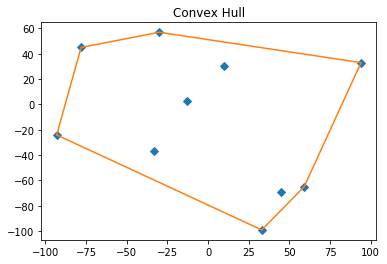

ConvexHullPoint: [[-93 -24]
 [ 33 -99]
 [ 59 -65]
 [ 94  33]
 [-30  57]
 [-78  45]
 [-93 -24]]


In [31]:
import numpy as np
from collections import namedtuple 
import matplotlib.pyplot as plt
import random 


Point = namedtuple('Point', 'x y')

class ConvexHull(object):  
    _points = []
    _hull_points = []

    def __init__(self):
        pass

    def add(self, point):
        self._points.append(point)

    def _get_orientation(self, origin, p1, p2):
        '''
        Returns the orientation of the Point p1 with regards to Point p2 using origin.
        Negative if p1 is clockwise of p2.
        :param p1:
        :param p2:
        :return: integer
        '''
        difference = (
            ((p2.x - origin.x) * (p1.y - origin.y))
            - ((p1.x - origin.x) * (p2.y - origin.y))
        )

        return difference

    def compute_hull(self):
        '''
        Computes the points that make up the convex hull.
        '''
        points = self._points

        # get leftmost point
        start = points[0]
        min_x = start.x
        for p in points[1:]:
            if p.x < min_x:
                min_x = p.x
                start = p

        point = start
        self._hull_points.append(start)

        far_point = None
        while far_point is not start:
            
            # get the first point (initial max) to use to compare with others
            p1 = None
            for p in points:
                if p is point:
                    continue
                else:
                    p1 = p
                    break

            far_point = p1
 
            for p2 in points:
                # ensure we aren't comparing to self or pivot point
                if p2 is point or p2 is p1:
                    continue
                else:
                    direction = self._get_orientation(point, far_point, p2)
                    if direction > 0:
                        far_point = p2

            self._hull_points.append(far_point)
            point = far_point


    def get_hull_points(self):
        if self._points and not self._hull_points:
            self.compute_hull()

        return self._hull_points

    def display(self):
        # all points
        x = [p.x for p in self._points]
        y = [p.y for p in self._points]
        plt.plot(x, y, marker='D', linestyle='None')

        # hull points
        hx = [p.x for p in self._hull_points]
        hy = [p.y for p in self._hull_points]
        plt.plot(hx, hy)

        plt.title('Convex Hull')
        plt.show()


def main():  
    ch = ConvexHull()

    for _ in range(10):
        ch.add(Point(random.randint(-100, 100), random.randint(-100, 100)))

    getConvexHullPoint=np.array(ch.get_hull_points())
    ch.display()

    print('ConvexHullPoint:',getConvexHullPoint)
 

main()

### Convex Hull과의 거리 구하기

![title](http://cfile219.uf.daum.net/image/99CEE1335A1D71331C51D4)

![title](http://cfile223.uf.daum.net/image/99C38E335A1D713334830D)

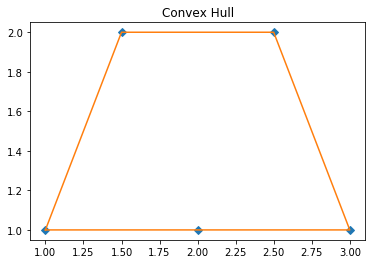

ConvexHullPoint: [[ 1.   1. ]
 [ 3.   1. ]
 [ 2.5  2. ]
 [ 1.5  2. ]
 [ 1.   1. ]]
pnt2lineset: [[ 0.2         1.56524758  0.87321246  0.04472136]
 [ 1.2         0.53851648  0.2         0.53851648]]
convex_dist: [ 0.04472136  0.2       ]
knn_dist_avg: [1.085287961779532 1.0802265663579127]
knn_dist_hybrid: [1.1095516945358768 1.1878905819674077]


In [33]:
import math
import numpy as np
import operator
from collections import namedtuple 
import matplotlib.pyplot as plt  


########### Convex Hull의 좌표 구하기 for ConvexHull Distance #############
Point = namedtuple('Point', 'x y')

class ConvexHull(object):  

    _points = []
    _hull_points = []

    def __init__(self):
        pass

    def add(self, point):
        self._points.append(point)

    def _get_orientation(self, origin, p1, p2):
        '''
        Returns the orientation of the Point p1 with regards to Point p2 using origin.
        Negative if p1 is clockwise of p2.
        :param p1:
        :param p2:
        :return: integer
        '''
        difference = (
            ((p2.x - origin.x) * (p1.y - origin.y))
            - ((p1.x - origin.x) * (p2.y - origin.y))
        )

        return difference

    def compute_hull(self):
        '''
        Computes the points that make up the convex hull.
        :return:
        '''
        points = self._points

        # get leftmost point
        start = points[0]
        min_x = start.x
        for p in points[1:]:
            if p.x < min_x:
                min_x = p.x
                start = p

        point = start
        self._hull_points.append(start)

        far_point = None
        while far_point is not start:
            
            # get the first point (initial max) to use to compare with others
            p1 = None
            for p in points:
                if p is point:
                    continue
                else:
                    p1 = p
                    break

            far_point = p1
 
            for p2 in points:
                # ensure we aren't comparing to self or pivot point
                if p2 is point or p2 is p1:
                    continue
                else:
                    direction = self._get_orientation(point, far_point, p2)
                    if direction > 0:
                        far_point = p2


            self._hull_points.append(far_point)
            point = far_point


    def get_hull_points(self):
        if self._points and not self._hull_points:
            self.compute_hull()

        return self._hull_points

    def display(self):
        # all points
        x = [p.x for p in self._points]
        y = [p.y for p in self._points]
        plt.plot(x, y, marker='D', linestyle='None')

        # hull points
        hx = [p.x for p in self._hull_points]
        hy = [p.y for p in self._hull_points]
        plt.plot(hx, hy)

        plt.title('Convex Hull')
        plt.show()


########### Convex Hull까지의 거리 구하기 for ConvexHull Distance #############

def pnt2line(pnt, start, end):
    line_vec = vector(start, end)
    pnt_vec = vector(start, pnt)
    line_len = length(line_vec)
    line_unitvec = unit(line_vec)
    pnt_vec_scaled = scale(pnt_vec, 1.0/line_len)
    t = dot(line_unitvec, pnt_vec_scaled)    
    if t < 0.0:
        t = 0.0
    elif t > 1.0:
        t = 1.0
    nearest = scale(line_vec, t)
    dist = distance(nearest, pnt_vec)
    nearest = add(nearest, start)
    return (dist, nearest)

def getconvexdist(arrtestSet,getConvexHullPoint):

    pnt2lineset=[]
    for i in range(arrtestSet.shape[0]):
        for j in range(getConvexHullPoint.shape[0]-1):
        #pnt2line(pnt, getConvexHullPoint[i], getConvexHullPoint[i+1])
            result=pnt2line(arrtestSet[i], getConvexHullPoint[j], getConvexHullPoint[j+1])
            pnt2lineset.append(result[0])

    pnt2lineset=np.reshape(pnt2lineset,(arrtestSet.shape[0],getConvexHullPoint.shape[0]-1))
    convex_dist=np.min(pnt2lineset,axis=1)
    print('pnt2lineset:',pnt2lineset)

    return convex_dist

def dot(v,w):
    x,y = v
    X,Y = w
    return x*X + y*Y

def length(v):
    x,y = v
    return math.sqrt(x*x + y*y)

def vector(b,e):
    x,y = b
    X,Y = e
    return (X-x, Y-y)

def unit(v):
    x,y = v
    mag = length(v)
    return (x/mag, y/mag)

def distance(p0,p1):
    return length(vector(p0,p1))

def scale(v,sc):
    x,y = v
    return (x * sc, y * sc)

def add(v,w):
    x,y = v
    X,Y = w
    return (x+X, y+Y)


########### KNN Information구하기 for KNN Avg Distance #############

def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x])
    return neighbors


def main():  
    ch = ConvexHull()

#    trainingSet = [[1,2,'s'],[2,2,'s'],[3,2,'s'],[4,2,'s'],[1,1,'s'],[2,1,'s'],[3,1,'s'],[4,1,'s']]
#    testSet = [[2.5,2.5,'a'],[0.7,1,'a']]

    trainingSet = [[1,1,'s'],[3,1,'s'],[2,1,'s'],[1.5,2,'s'],[2.5,2,'s']]
    testSet = [[1.15,1.2,'a'],[2,2.2,'a']]

    arrtrainingSet=np.array(trainingSet)
    arrtestSet=np.array(testSet)

    arrtrainingSet=arrtrainingSet[:,:-1].astype(np.float)
    arrtestSet=arrtestSet[:,:-1].astype(np.float)
  
    for i in range(arrtrainingSet.shape[0]):
        ch.add(Point(arrtrainingSet[i,0], arrtrainingSet[i,1]))

#    for _ in range(6):
#        ch.add(Point(random.randint(-100, 100), random.randint(-100, 100)))

    #print("Points on hull:", ch.get_hull_points())
    getConvexHullPoint=np.array(ch.get_hull_points())
    ch.display()

    print('ConvexHullPoint:',getConvexHullPoint)

    convex_dist=getconvexdist(arrtestSet,getConvexHullPoint)

    print('convex_dist:',convex_dist)
        
    k = 5
    neighbors_inform=[]
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        neighbors_inform.append(neighbors)
        
    neighbors_dist=np.array(neighbors_inform)[:,:,1]
    knn_dist_avg=np.mean(neighbors_dist,axis=1)
    
    #print('neighbors_dist:',neighbors_dist)
    print('knn_dist_avg:',knn_dist_avg)
    
    knn_dist_hybrid=knn_dist_avg*2/(1+np.exp(-convex_dist))
    print('knn_dist_hybrid:',knn_dist_hybrid)
    
    
main()

![title](http://cfile232.uf.daum.net/image/99F62F335A1D7133305609)